In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/canadz-income-statistics/14100417_MetaData.csv
/kaggle/input/canadz-income-statistics/14100417.csv
/kaggle/input/canada-occupation-statistics/14100023_MetaData.csv
/kaggle/input/canada-occupation-statistics/14100023.csv


In [2]:
df1=pd.read_csv("/kaggle/input/canadz-income-statistics/14100417_MetaData.csv")
df2=pd.read_csv("/kaggle/input/canadz-income-statistics/14100417.csv")
df3=pd.read_csv("/kaggle/input/canada-occupation-statistics/14100023_MetaData.csv")
df4=pd.read_csv("/kaggle/input/canada-occupation-statistics/14100023.csv")

In [10]:
df4.columns

Index(['ref_date', 'geo', 'dguid', 'labour force characteristics',
       'north american industry classification system (naics)', 'sex',
       'age group', 'uom', 'uom_id', 'scalar_factor', 'scalar_id', 'vector',
       'coordinate', 'value', 'status', 'symbol', 'terminated', 'decimals'],
      dtype='object')

In [11]:
df1.columns = [col.lower() for col in df1.columns]
df2.columns = [col.lower() for col in df2.columns]
df3.columns = [col.lower() for col in df3.columns]
df4.columns = [col.lower() for col in df4.columns]
df1.columns
df2=df2[['ref_date', 'geo', 'wages', 'type of work','national occupational classification (noc)', 'sex', 'age group', 'value']]
df4=df4[['ref_date', 'geo', 'labour force characteristics','north american industry classification system (naics)', 'sex', 'age group','value']]


In [14]:
print(df2['wages'].unique())
print(df2['type of work'].unique())
print(df2['sex'].unique())

['Total employees, all wages' 'Average hourly wage rate'
 'Average weekly wage rate' 'Median hourly wage rate'
 'Median weekly wage rate' 'Average hourly gender wage ratio'
 'Median hourly gender wage ratio' 'Average weekly gender wage ratio'
 'Median weekly gender wage ratio']
['Both full- and part-time employees' 'Full-time employees'
 'Part-time employees']
['Both sexes' 'Males' 'Females']


In [23]:
df2[df2.wages=='Total employees, all wages']

,ref_date,geo,wages,type of work,national occupational classification (noc),sex,age group,value
0,1997,Canada,"Total employees, all wages",Both full- and part-time employees,"Total employees, all occupations [00-95]",Both sexes,15 years and over,11364.5
1,1997,Canada,"Total employees, all wages",Both full- and part-time employees,"Total employees, all occupations [00-95]",Both sexes,15 to 24 years,1877.8
2,1997,Canada,"Total employees, all wages",Both full- and part-time employees,"Total employees, all occupations [00-95]",Both sexes,25 to 54 years,8590.9
3,1997,Canada,"Total employees, all wages",Both full- and part-time employees,"Total employees, all occupations [00-95]",Both sexes,55 years and over,895.8
4,1997,Canada,"Total employees, all wages",Both full- and part-time employees,"Total employees, all occupations [00-95]",Males,15 years and over,5954.5
...,...,...,...,...,...,...,...,...
5660455,2023,British Columbia,"Total employees, all wages",Part-time employees,"Labourers in processing, manufacturing and uti...",Males,55 years and over,NaN
5660456,2023,British Columbia,"Total employees, all wages",Part-time employees,"Labourers in processing, manufacturing and uti...",Females,15 years and over,NaN
5660457,2023,British Columbia,"Total employees, all wages",Part-time employees,"Labourers in processing, manufacturing and uti...",Females,15 to 24 years,NaN
5660458,2023,British Columbia,"Total employees, all wages",Part-time employees,"Labourers in processing, manufacturing and uti...",Females,25 to 54 years,NaN


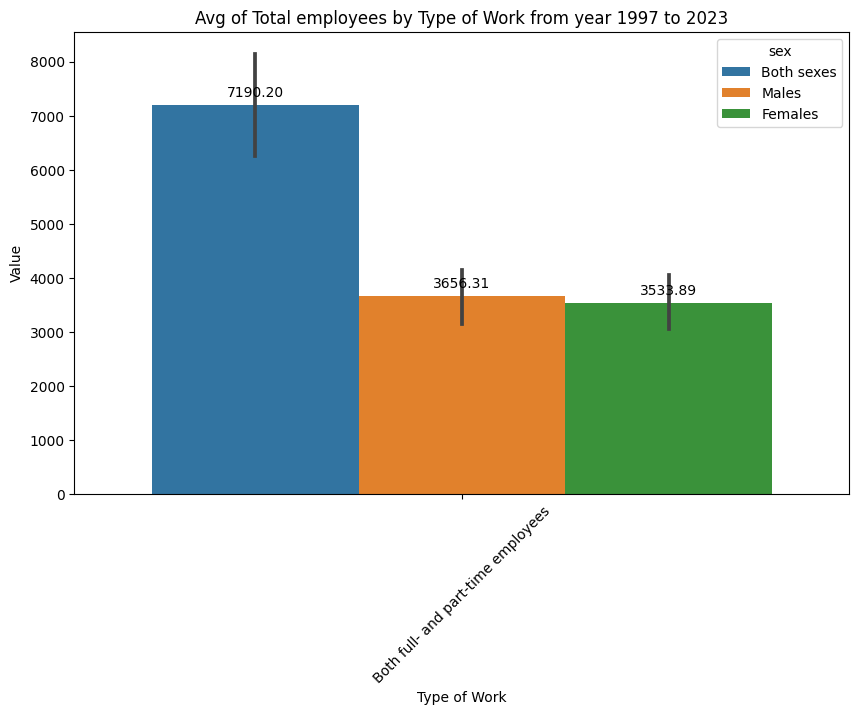

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

df_total_employees = df2[(df2['wages'] == 'Total employees, all wages') & (df2['geo'] == 'Canada') & (df2['type of work'] == 'Both full- and part-time employees') & (df2['national occupational classification (noc)'] == 'Total employees, all occupations [00-95]')]

plt.figure(figsize=(10, 6))
ax =sns.barplot(data=df_total_employees, x='type of work', y='value',estimator='mean', hue='sex')
plt.title('Avg of Total employees by Type of Work from year 1997 to 2023')
plt.xlabel('Type of Work')
plt.ylabel('Value')
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.show()



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

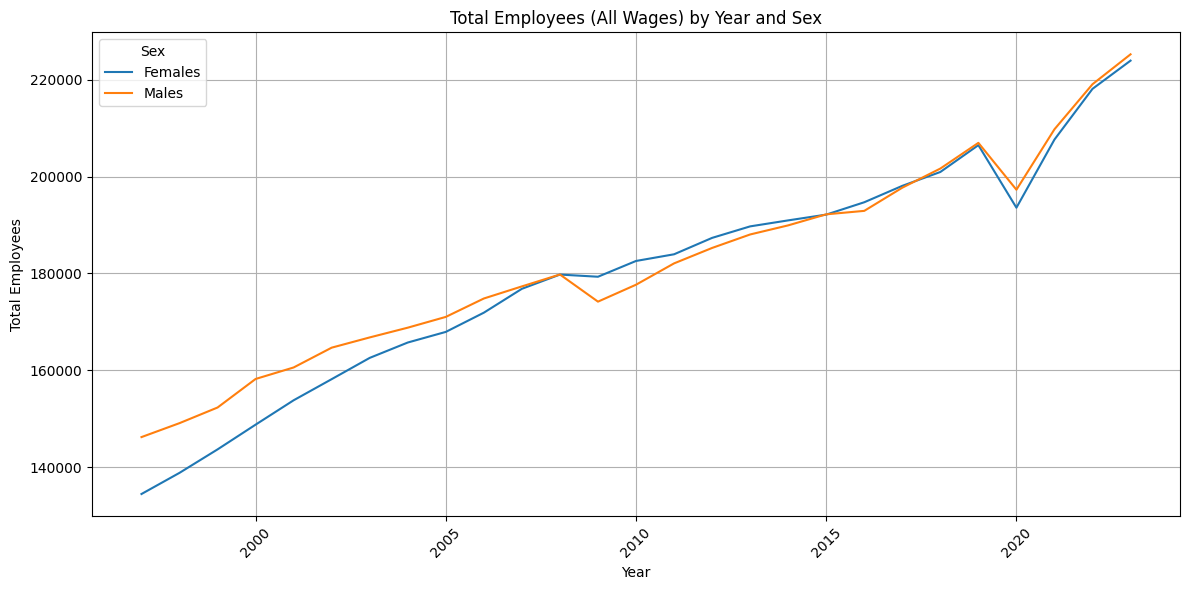

In [30]:
# Filter data for 'Total employees, all wages'
df_total_employees = df2[df2['wages'] == 'Total employees, all wages']
df_total_employees=df_total_employees[df_total_employees.sex !='Both sexes']
# Group data by 'ref_date' (year) and 'sex', and calculate the sum of 'value'
total_employees_by_year_sex = df_total_employees.groupby(['ref_date', 'sex'])['value'].sum().reset_index()

# Plot line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=total_employees_by_year_sex, x='ref_date', y='value', hue='sex')
plt.title('Total Employees (All Wages) by Year and Sex')
plt.xlabel('Year')
plt.ylabel('Total Employees')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Sex')
plt.tight_layout()
plt.show()


In [43]:
df_total_employees[['geo', 'wages', 'type of work',
       'national occupational classification (noc)', 'sex', 'age group']].drop_duplicates()

,geo,wages,type of work,national occupational classification (noc),sex,age group
4,Canada,"Total employees, all wages",Both full- and part-time employees,"Total employees, all occupations [00-95]",Males,15 years and over
5,Canada,"Total employees, all wages",Both full- and part-time employees,"Total employees, all occupations [00-95]",Males,15 to 24 years
6,Canada,"Total employees, all wages",Both full- and part-time employees,"Total employees, all occupations [00-95]",Males,25 to 54 years
7,Canada,"Total employees, all wages",Both full- and part-time employees,"Total employees, all occupations [00-95]",Males,55 years and over
8,Canada,"Total employees, all wages",Both full- and part-time employees,"Total employees, all occupations [00-95]",Females,15 years and over
9,Canada,"Total employees, all wages",Both full- and part-time employees,"Total employees, all occupations [00-95]",Females,15 to 24 years
10,Canada,"Total employees, all wages",Both full- and part-time employees,"Total employees, all occupations [00-95]",Females,25 to 54 years
11,Canada,"Total employees, all wages",Both full- and part-time employees,"Total employees, all occupations [00-95]",Females,55 years and over


In [46]:
df2.geo.unique()

array(['Canada', 'Newfoundland and Labrador', 'Prince Edward Island',
       'Nova Scotia', 'New Brunswick', 'Quebec', 'Ontario', 'Manitoba',
       'Saskatchewan', 'Alberta', 'British Columbia'], dtype=object)

In [57]:
# Filter data for 'Total employees, all wages' and remove 'Both sexes' category
df_total_employees = df2[(df2['wages'] == 'Total employees, all wages') & (df2['age group'] == '15 years and over') & (df2['sex'] != 'Both sexes')& (df2['geo'] == 'Canada') & (df2['type of work'] == 'Both full- and part-time employees') & (df2['national occupational classification (noc)'] == 'Total employees, all occupations [00-95]')]

# Group data by 'ref_date' (year) and 'sex', and calculate the sum of 'value'
total_employees_by_year_sex = df_total_employees.groupby(['ref_date', 'sex'])['value'].sum().reset_index()

# Plot line chart using Plotly Express
fig = px.line(total_employees_by_year_sex, x='ref_date', y='value', color='sex',
              title='Total Employees (All Wages) by Year and Sex',
              labels={'ref_date': 'Year', 'value': 'Total Employees', 'sex': 'Sex'})

# Customize layout
fig.update_layout(xaxis_tickangle=-45, xaxis_title='Year', yaxis_title='Total Employees', legend_title='Sex')

# Show plot
fig.show()


/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [58]:
# Group data by 'ref_date' (year) and 'sex', and calculate the sum of 'value'
total_employees_by_year_sex = df_total_employees.groupby(['ref_date', 'sex'])['value'].sum().reset_index()

# Pivot the data to have 'ref_date' as index and 'sex' as columns
pivot_df = total_employees_by_year_sex.pivot(index='ref_date', columns='sex', values='value')

# Calculate percentage difference between male and female employees
pivot_df['Percentage Difference'] = ((pivot_df['Males'] - pivot_df['Females']) / pivot_df['Females']) * 100

# Reset index to include 'ref_date' as a column
pivot_df.reset_index(inplace=True)

# Plot line chart using Plotly Express
fig = px.line(pivot_df, x='ref_date', y='Percentage Difference',
              title='Percentage Difference in Total Employees (Male vs. Female) by Year',
              labels={'ref_date': 'Year', 'Percentage Difference': 'Percentage Difference (%)'})

# Customize layout
fig.update_layout(xaxis_tickangle=-45, xaxis_title='Year', yaxis_title='Percentage Difference (%)')

# Show plot
fig.show()


In [54]:
df_total_employees

,ref_date,geo,wages,type of work,national occupational classification (noc),sex,age group,value
5,1997,Canada,"Total employees, all wages",Both full- and part-time employees,"Total employees, all occupations [00-95]",Males,15 to 24 years,983.1
6,1997,Canada,"Total employees, all wages",Both full- and part-time employees,"Total employees, all occupations [00-95]",Males,25 to 54 years,4456.6
7,1997,Canada,"Total employees, all wages",Both full- and part-time employees,"Total employees, all occupations [00-95]",Males,55 years and over,514.8
9,1997,Canada,"Total employees, all wages",Both full- and part-time employees,"Total employees, all occupations [00-95]",Females,15 to 24 years,894.7
10,1997,Canada,"Total employees, all wages",Both full- and part-time employees,"Total employees, all occupations [00-95]",Females,25 to 54 years,4134.3
...,...,...,...,...,...,...,...,...
5467182,2023,Canada,"Total employees, all wages",Both full- and part-time employees,"Total employees, all occupations [00-95]",Males,25 to 54 years,5826.3
5467183,2023,Canada,"Total employees, all wages",Both full- and part-time employees,"Total employees, all occupations [00-95]",Males,55 years and over,1757.5
5467185,2023,Canada,"Total employees, all wages",Both full- and part-time employees,"Total employees, all occupations [00-95]",Females,15 to 24 years,1291.4
5467186,2023,Canada,"Total employees, all wages",Both full- and part-time employees,"Total employees, all occupations [00-95]",Females,25 to 54 years,5673.4


In [76]:
import plotly.graph_objects as go

# Create an empty figure
fig = go.Figure()

# Loop through each unique geographical location
for geo in df_total_employees['geo'].unique():
    # Filter data for the current geographical location
    df_geo = total_employees_by_year_sex_geo[total_employees_by_year_sex_geo['geo'] == geo]
    
    # Add a line to the plot for the current geographical location
    fig.add_trace(go.Scatter(x=df_geo['ref_date'], y=df_geo['value'], mode='lines', name=geo))

# Update plot layout
fig.update_layout(
    title="Total Employees (All Wages) by Year for Different Geographical Locations",
    xaxis_title="Year",
    yaxis_title="Total Employees",
    legend_title="Geographical Location",
    height=600,  # Adjust height as needed
    width=1000   # Adjust width as needed
)

# Show plot
fig.show()


In [81]:
total_employees_by_year_sex_geo

,ref_date,sex,geo,value
0,1997,Females,Alberta,542.3
1,1997,Females,British Columbia,722.8
2,1997,Females,Manitoba,207.7
3,1997,Females,New Brunswick,125.1
4,1997,Females,Newfoundland and Labrador,79.8
...,...,...,...,...
535,2023,Males,Nova Scotia,215.9
536,2023,Males,Ontario,3466.2
537,2023,Males,Prince Edward Island,38.9
538,2023,Males,Quebec,2053.0


In [85]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# Filter data for 'Total employees, all wages' and remove 'Both sexes' category
df_total_employees = df2[(df2['wages'] == 'Total employees, all wages') & (df2['age group'] == '15 years and over') & (df2['sex'] != 'Both sexes')& (df2['geo'] != 'Canada') & (df2['type of work'] == 'Both full- and part-time employees') & (df2['national occupational classification (noc)'] == 'Total employees, all occupations [00-95]')]
# Group data by 'ref_date' (year), 'sex', and 'geo', and calculate the sum of 'value'
total_employees_by_year_sex_geo = df_total_employees.groupby(['ref_date', 'sex', 'geo'])['value'].sum().reset_index()
import plotly.graph_objects as go

# Create subplots
fig = make_subplots(rows=5, cols=2, subplot_titles=df_total_employees['geo'].unique(), shared_xaxes=True)
colors = {'Males': 'blue', 'Females': 'red'}
# Loop through each unique geographical location
for i, geo in enumerate(df_total_employees['geo'].unique(), start=1):
    
    # Filter data for the current geographical location
    df_geo = total_employees_by_year_sex_geo[total_employees_by_year_sex_geo['geo'] == geo]
    
    # Calculate subplot position
    col_num = 1 if i <= 5 else 2
    row_num = i if i <= 5 else i - 5
    
    # Add a line to the subplot
    fig.add_trace(go.Scatter(x=df_geo[df_geo.sex=='Males']['ref_date'], y=df_geo[df_geo.sex=='Males']['value'], mode='lines',line=dict(color=colors['Males']), name=geo), row=row_num, col=col_num)
    fig.add_trace(go.Scatter(x=df_geo[df_geo.sex=='Females']['ref_date'], y=df_geo[df_geo.sex=='Females']['value'], mode='lines',line=dict(color=colors['Females']), name=geo), row=row_num, col=col_num)
    
# Update subplot layout
fig.update_layout(
    height=800,
    width=1200,
    title_text="Total Employees (All Wages) by Year & Sex for Different Geographical Locations",
    showlegend=False
)

# Show plot
fig.show()


In [87]:
df2.wages.unique()

array(['Total employees, all wages', 'Average hourly wage rate',
       'Average weekly wage rate', 'Median hourly wage rate',
       'Median weekly wage rate', 'Average hourly gender wage ratio',
       'Median hourly gender wage ratio',
       'Average weekly gender wage ratio',
       'Median weekly gender wage ratio'], dtype=object)

In [95]:
# Filter data for 'Average weekly wage rate' and remove 'Both sexes' category
df_avg_wage = df2[(df2['wages'] == 'Average weekly wage rate') & (df2['age group'] == '15 years and over') & (df2['sex'] != 'Both sexes')& (df2['geo'] == 'Canada') & (df2['type of work'] == 'Both full- and part-time employees') & (df2['national occupational classification (noc)'] == 'Total employees, all occupations [00-95]')]

# Group data by 'ref_date' (year) and 'sex', and calculate the sum of 'value'
avg_wage_by_year_sex = df_avg_wage.groupby(['ref_date', 'sex'])['value'].sum().reset_index()

# Plot line chart using Plotly Express
fig = px.line(total_employees_by_year_sex, x='ref_date', y='value', color='sex',
              title='Average weekly wage rate by Year and Sex', labels={'ref_date': 'Year', 'value': 'Total Employees', 'sex': 'Sex'})

# Customize layout
fig.update_layout(xaxis_tickangle=-45, xaxis_title='Year', yaxis_title='Total Employees', legend_title='Sex')

# Show plot
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [96]:

# Pivot the data to have 'ref_date' as index and 'sex' as columns
pivot_df = avg_wage_by_year_sex.pivot(index='ref_date', columns='sex', values='value')

# Calculate percentage difference between male and female employees
pivot_df['Percentage Difference'] = ((pivot_df['Males'] - pivot_df['Females']) / pivot_df['Females']) * 100

# Reset index to include 'ref_date' as a column
pivot_df.reset_index(inplace=True)

# Plot line chart using Plotly Express
fig = px.line(pivot_df, x='ref_date', y='Percentage Difference',
              title='Percentage Difference in avg Wage for Male vs. Female  by Year',
              labels={'ref_date': 'Year', 'Percentage Difference': 'Percentage Difference (%)'})

# Customize layout
fig.update_layout(xaxis_tickangle=-45, xaxis_title='Year', yaxis_title='Percentage Difference (%)')

# Show plot
fig.show()


In [103]:
df_avg_wage

,ref_date,geo,wages,type of work,national occupational classification (noc),sex,age group,value
23368,1997,Newfoundland and Labrador,Average weekly wage rate,Both full- and part-time employees,"Total employees, all occupations [00-95]",Males,15 years and over,596.64
23372,1997,Newfoundland and Labrador,Average weekly wage rate,Both full- and part-time employees,"Total employees, all occupations [00-95]",Females,15 years and over,387.80
42484,1997,Prince Edward Island,Average weekly wage rate,Both full- and part-time employees,"Total employees, all occupations [00-95]",Males,15 years and over,505.88
42488,1997,Prince Edward Island,Average weekly wage rate,Both full- and part-time employees,"Total employees, all occupations [00-95]",Females,15 years and over,377.92
61600,1997,Nova Scotia,Average weekly wage rate,Both full- and part-time employees,"Total employees, all occupations [00-95]",Males,15 years and over,569.35
...,...,...,...,...,...,...,...,...
5624360,2023,Saskatchewan,Average weekly wage rate,Both full- and part-time employees,"Total employees, all occupations [00-95]",Females,15 years and over,1026.42
5643472,2023,Alberta,Average weekly wage rate,Both full- and part-time employees,"Total employees, all occupations [00-95]",Males,15 years and over,1544.48
5643476,2023,Alberta,Average weekly wage rate,Both full- and part-time employees,"Total employees, all occupations [00-95]",Females,15 years and over,1083.90
5662588,2023,British Columbia,Average weekly wage rate,Both full- and part-time employees,"Total employees, all occupations [00-95]",Males,15 years and over,1448.97


In [101]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# Filter data for 'Average weekly wage rate' and remove 'Both sexes' category
df_avg_wage = df2[(df2['wages'] == 'Average weekly wage rate') & (df2['age group'] == '15 years and over') & (df2['sex'] != 'Both sexes')& (df2['geo'] != 'Canada') & (df2['type of work'] == 'Both full- and part-time employees') & (df2['national occupational classification (noc)'] == 'Total employees, all occupations [00-95]')]
# Group data by 'ref_date' (year), 'sex', and 'geo', and calculate the sum of 'value'
df_avg_wage_by_year_sex_geo = df_avg_wage.groupby(['ref_date', 'sex', 'geo'])['value'].sum().reset_index()
import plotly.graph_objects as go

# Create subplots
fig = make_subplots(rows=5, cols=2, subplot_titles=df_total_employees['geo'].unique(), shared_xaxes=True)
colors = {'Males': 'blue', 'Females': 'red'}
# Loop through each unique geographical location
for i, geo in enumerate(df_avg_wage['geo'].unique(), start=1):
    #print(geo)
    # Filter data for the current geographical location
    df_geo = df_avg_wage_by_year_sex_geo[df_avg_wage_by_year_sex_geo['geo'] == geo]
    
    # Calculate subplot position
    col_num = 1 if i <= 5 else 2
    row_num = i if i <= 5 else i - 5
    
    # Add a line to the subplot
    fig.add_trace(go.Scatter(x=df_geo[df_geo.sex=='Males']['ref_date'], y=df_geo[df_geo.sex=='Males']['value'], mode='lines',line=dict(color=colors['Males']), name=geo), row=row_num, col=col_num)
    fig.add_trace(go.Scatter(x=df_geo[df_geo.sex=='Females']['ref_date'], y=df_geo[df_geo.sex=='Females']['value'], mode='lines',line=dict(color=colors['Females']), name=geo), row=row_num, col=col_num)
    
# Update subplot layout
fig.update_layout(
    height=800,
    width=1200,
    title_text="Avg wage by Year & Sex for Different Geographical Locations",
    showlegend=False
)

# Show plot
fig.show()


In [65]:
df_total_employees['geo'].unique()

array(['Newfoundland and Labrador', 'Prince Edward Island', 'Nova Scotia',
       'New Brunswick', 'Quebec', 'Ontario', 'Manitoba', 'Saskatchewan',
       'Alberta', 'British Columbia'], dtype=object)

In [4]:
df=pd.read_csv("/kaggle/input/canada-occupation-statistics/14100023_MetaData.csv")
df.head()

,Cube Title,Product Id,CANSIM Id,URL,Cube Notes,Archive Status,Frequency,Start Reference Period,End Reference Period,Total number of dimensions
"Labour force characteristics by industry, annual",14100023,282-0008,https://www150.statcan.gc.ca/t1/tbl1/en/tv.act...,11;22,CURRENT - a cube available to the public and t...,Annual,1976-01-01,2023-01-01,5.0,NaN
Dimension ID,Dimension name,Dimension Notes,Dimension Definitions,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Geography,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Labour force characteristics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,North American Industry Classification System ...,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
df4['labour force characteristics'].unique()

array(['Labour force', 'Employment', 'Full-time employment',
       'Part-time employment', 'Unemployment', 'Unemployment rate'],
      dtype=object)

In [107]:
df4[(df4['labour force characteristics']=='Full-time employment') & (df4.geo=="Canada")]

,ref_date,geo,labour force characteristics,north american industry classification system (naics),sex,age group,value
468,1976,Canada,Full-time employment,"Total, all industries",Both sexes,15 years and over,8529.7
469,1976,Canada,Full-time employment,"Total, all industries",Both sexes,15 to 24 years,2000.0
470,1976,Canada,Full-time employment,"Total, all industries",Both sexes,25 to 54 years,5539.2
471,1976,Canada,Full-time employment,"Total, all industries",Both sexes,55 years and over,990.5
472,1976,Canada,Full-time employment,"Total, all industries",Males,15 years and over,5765.7
...,...,...,...,...,...,...,...
977287,2023,Canada,Full-time employment,Public administration [91],Males,55 years and over,101.4
977288,2023,Canada,Full-time employment,Public administration [91],Females,15 years and over,581.8
977289,2023,Canada,Full-time employment,Public administration [91],Females,15 to 24 years,29.1
977290,2023,Canada,Full-time employment,Public administration [91],Females,25 to 54 years,454.5
